In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import patches
import pandas as pd

import sys
sys.path.append('../scripts/')
import sigjson_f2021b

In [3]:
from astropy import table
from astropy.io import fits

In [4]:
obsdir="/Users/kadofong/Google Drive/My Drive/MerianSurvey/observing/DataLogs/"

In [6]:
db = table.Table(fits.open(f'{obsdir}/db_merian.fits')[1].data)

In [7]:
from skipper import observe

In [8]:
tele = pd.read_csv ( f'{obsdir}/tele20220112.csv')

In [9]:
halpha_s2022a = pd.read_csv('../pointings/gama_2022A.csv', index_col='object.1')

oiii_pointings = sigjson_f2021b.load_mastercat_cosmos ()
halpha_pointings = sigjson_f2021b.load_mastercat_cosmos ( '../pointings/S2021A.csv')
all_pointings = np.concatenate([oiii_pointings.index, halpha_pointings.index])

get_catalog_objects = lambda x: x['object'].str.extract(r'(.*?(?=_))')[0]
oiii_s2022a = halpha_s2022a.copy()
oiii_s2022a['filter'] = 'N540'
oiii_s2022a['object'] = [ xo.replace('N708','N540') for xo in oiii_s2022a['object'] ]
oiii_s2022a.index = oiii_s2022a['object']
oiii_s2022a['expTime'] = 900.


halpha_cosmos = halpha_pointings.loc[get_catalog_objects(halpha_pointings)=='COSMOS'].copy()
halpha_cosmos['priority_name'] = 'COSMOS'
halpha_s2022a = pd.concat([halpha_s2022a, halpha_cosmos], sort=False)                                   

oiii_cosmos = oiii_pointings.loc[get_catalog_objects(oiii_pointings)=='COSMOS'].copy()
oiii_cosmos['priority_name'] = 'COSMOS'
oiii_s2022a = pd.concat([oiii_s2022a, oiii_cosmos], sort=False)

In [12]:
obs = oiii_s2022a.reindex(tele['object'])
obs = obs.loc[~obs['object'].isna()]

In [13]:
is_oiii = tele['filter'] == 'N540'
is_spring = tele['object'].apply(lambda x: 'COSMOS' in x or 'GAMA' in x)

In [14]:
tobj = tele.set_index('object')

In [15]:
import datetime

In [18]:
dtdf = pd.Series(index=tobj.index)
for name in tobj.index:
    if not isinstance(tobj.loc[name,'date'],str):
        continue
    dts = tobj.loc[name,'date'].split('+')[0]
    dtime = datetime.datetime.strptime ( dts, '%Y-%m-%d %H:%M:%S.%f') 
    dtdf.loc[name] = dtime
cutoff = datetime.datetime(2022, 1, 12)
recent = dtdf > cutoff

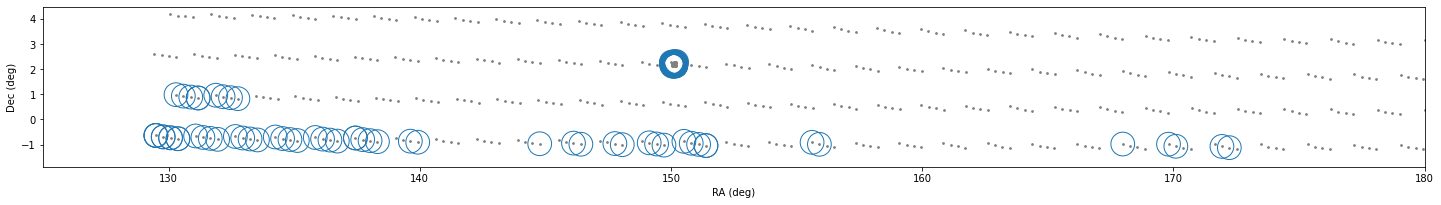

In [27]:
fig, ax = plt.subplots(1,1,figsize=(20,4),)
ax.set_aspect('equal')


plt.scatter ( oiii_s2022a['RA'], oiii_s2022a['dec'], color='grey', s=3 )
for name, row in obs.iterrows():
    color = 'tab:blue'
    circle = patches.Circle ( (float(row['RA']),float(row['dec'])), 
                             radius=np.sqrt(2.2)/np.pi, facecolor='None', 
                             edgecolor=color)
    ax.add_patch(circle)
    #plt.scatter ( obs['RA'], obs['dec'], color='r')
    
ax.set_xlabel('RA (deg)')
ax.set_ylabel('Dec (deg)')
ax.set_xlim(125,180)
plt.tight_layout ()

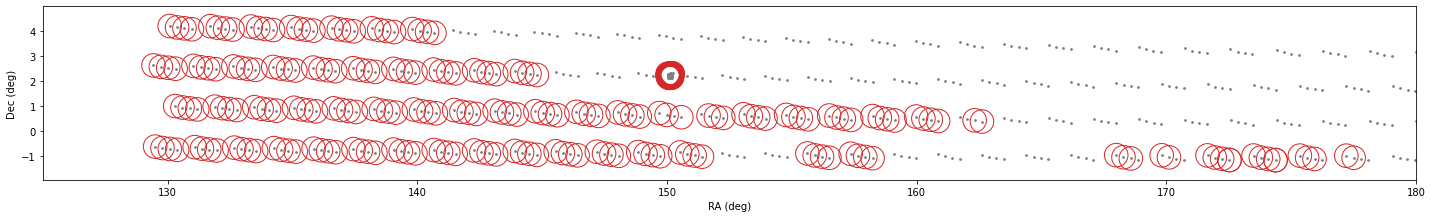

In [26]:
obs_halpha = halpha_s2022a.reindex(tele['object'])
obs_halpha = obs_halpha.loc[~obs_halpha['object'].isna()]

fig, ax = plt.subplots(1,1,figsize=(20,4),)
ax.set_aspect('equal')


plt.scatter ( halpha_s2022a['RA'], halpha_s2022a['dec'], color='grey', s=3 )
for name, row in obs_halpha.iterrows():
    color = 'tab:red'
    circle = patches.Circle ( (float(row['RA']),float(row['dec'])), 
                             radius=np.sqrt(2.2)/np.pi, facecolor='None', 
                             edgecolor=color)
    ax.add_patch(circle)
    #plt.scatter ( obs_halpha['RA'], obs_halpha['dec'], color='r')
    
ax.set_xlabel('RA (deg)')
ax.set_ylabel('Dec (deg)')
ax.set_xlim(125,180)
plt.tight_layout ()

In [30]:
ctio = observe.ObservingSite ()
night_start, night_end = ctio.get_sunriseset ( 2022,2,2)

In [31]:
from astropy import units as u

In [39]:
night_start + datetime.timedelta(hours=1.)

datetime.datetime(2022, 2, 3, 1, 48, tzinfo=<UTC>)

In [89]:
import sigjson_s2022a

In [118]:
is_queued_oiii, is_queued_halpha = sigjson_s2022a.predict_all ()

On 2022/1/25, we are observing COSMOSGAMA in N540
We are observing the second half of the night
5 pointings in this catalog need reobservation!
[predict] night slot: Second half
obsStart: 2022/01/26 01:45 AM Santiago
          2022/01/25 11:45 PM ET
          2022/01/25 08:45 PM PT
          2022/01/26 04:45 AM UTC
obsEnd:   2022/01/26 05:57 AM Santiago
          2022/01/26 03:57 AM ET
          2022/01/26 12:57 AM PT
          2022/01/26 08:57 AM UTC
Moon illumination is: 0.42
Moon max altitude during observation is: 53.52
Minimum airmass available: 1.1816714918621922

==> 20220126_04, 900.0000000000097s available
0.0s filled by priority=0.0 objects
900.0s filled by priority=1.0 objects
0.0s filled by priority=2.0 objects
0.0s filled by priority=3.0 objects
Minimum airmass available: 1.1465630002540206

==> 20220126_05, 3600.0s available
0.0s filled by priority=0.0 objects
3600.0s filled by priority=1.0 objects
0.0s filled by priority=2.0 objects
0.0s filled by priority=3.0 objects
Mi

(60s) Not enough time for an exposure. Skipping...
 .   . 
 {\*/} 
  >!<  BACKUP FIELD INFO
 (/^\) 
 '   ' 
time (UTC)		SXDS	COSMOS	
2022/01/29 04:30 AM	18.37	1.31	
2022/01/29 05:30 AM	-5.90	1.20	
2022/01/29 06:30 AM	-2.64	1.19	
2022/01/29 07:30 AM	-1.79	1.26	
2022/01/29 08:30 AM	-1.43	1.45	
2022/01/29 09:30 AM	-1.27	1.86	
------
Next script for SXDS [g] is ../json/backup_scripts/SXDS_5minAGN_g_04.json
------
Next script for SXDS [r] is ../json/backup_scripts/SXDS_5minAGN_r_02.json
------
Next script for COSMOS [g] is ../json/backup_scripts/COSMOS_5minAGN_g_06.json
------
Next script for COSMOS [r] is ../json/backup_scripts/COSMOS_5minAGN_r_05.json

<(-.-)>

On 2022/1/29, we are observing COSMOSGAMA in N540
We are observing the second half of the night
5 pointings in this catalog need reobservation!
[predict] night slot: Second half
obsStart: 2022/01/30 01:46 AM Santiago
          2022/01/29 11:46 PM ET
          2022/01/29 08:46 PM PT
          2022/01/30 04:46 AM UTC
obsEnd:   2022/0

Minimum airmass available: 1.229904180971344
(840s) Not enough time for an exposure. Skipping...
Minimum airmass available: 1.1690487422273383

==> 20220203_04, 3600.0s available
0.0s filled by priority=0.0 objects
3600.0s filled by priority=1.0 objects
0.0s filled by priority=2.0 objects
0.0s filled by priority=3.0 objects
Minimum airmass available: 1.163590193424292

==> 20220203_05, 3600.0s available
0.0s filled by priority=0.0 objects
3600.0s filled by priority=1.0 objects
0.0s filled by priority=2.0 objects
0.0s filled by priority=3.0 objects
Minimum airmass available: 1.143190180452713

==> 20220203_06, 3600.0s available
0.0s filled by priority=0.0 objects
3600.0s filled by priority=1.0 objects
0.0s filled by priority=2.0 objects
0.0s filled by priority=3.0 objects
Minimum airmass available: 1.1419596101627703

==> 20220203_07, 3600.0s available
0.0s filled by priority=0.0 objects
3600.0s filled by priority=1.0 objects
0.0s filled by priority=2.0 objects
0.0s filled by priority=3

Moon illumination is: 0.28
Moon max altitude during observation is: 0.00
Minimum airmass available: 1.2146444566551209

==> 20220206_03, 900.0000000000097s available
0.0s filled by priority=0.0 objects
900.0s filled by priority=1.0 objects
0.0s filled by priority=2.0 objects
0.0s filled by priority=3.0 objects
Minimum airmass available: 1.1861226758125176

==> 20220206_04, 3600.0s available
0.0s filled by priority=0.0 objects
3600.0s filled by priority=1.0 objects
0.0s filled by priority=2.0 objects
0.0s filled by priority=3.0 objects
Minimum airmass available: 1.1748017971279037

==> 20220206_05, 3600.0s available
0.0s filled by priority=0.0 objects
3600.0s filled by priority=1.0 objects
0.0s filled by priority=2.0 objects
0.0s filled by priority=3.0 objects
Minimum airmass available: 1.1425241051983015

==> 20220206_06, 3600.0s available
0.0s filled by priority=0.0 objects
3600.0s filled by priority=1.0 objects
0.0s filled by priority=2.0 objects
0.0s filled by priority=3.0 objects
M

0.0s filled by priority=0.0 objects
3600.0s filled by priority=1.0 objects
0.0s filled by priority=2.0 objects
0.0s filled by priority=3.0 objects
Minimum airmass available: 1.142357796007075

==> 20220209_06, 3600.0s available
0.0s filled by priority=0.0 objects
3600.0s filled by priority=1.0 objects
0.0s filled by priority=2.0 objects
0.0s filled by priority=3.0 objects
Minimum airmass available: 1.1419637258613333

==> 20220209_07, 3600.0s available
0.0s filled by priority=0.0 objects
0.0s filled by priority=1.0 objects
3600.0s filled by priority=2.0 objects
0.0s filled by priority=3.0 objects
Minimum airmass available: 1.1425087714212694

==> 20220209_08, 3600.0s available
0.0s filled by priority=0.0 objects
0.0s filled by priority=1.0 objects
3600.0s filled by priority=2.0 objects
0.0s filled by priority=3.0 objects
Minimum airmass available: 1.1438558601192221
(300s) Not enough time for an exposure. Skipping...
 .   . 
 {\*/} 
  >!<  BACKUP FIELD INFO
 (/^\) 
 '   ' 
time (UTC)		

Minimum airmass available: 1.1444923664002662

==> 20220301_08, 3600.0s available
0.0s filled by priority=0.0 objects
0.0s filled by priority=1.0 objects
0.0s filled by priority=2.0 objects
3600.0s filled by priority=3.0 objects
Minimum airmass available: 1.1513957337277805
(300s) Not enough time for an exposure. Skipping...
 .   . 
 {\*/} 
  >!<  BACKUP FIELD INFO
 (/^\) 
 '   ' 
time (UTC)		SXDS	COSMOS	
2022/03/01 04:30 AM	-2.59	1.19	
2022/03/01 05:30 AM	-1.77	1.26	
2022/03/01 06:30 AM	-1.42	1.46	
2022/03/01 07:30 AM	-1.26	1.88	
2022/03/01 08:30 AM	-1.22	2.93	
2022/03/01 09:30 AM	-1.26	8.01	
------
Next script for SXDS [g] is ../json/backup_scripts/SXDS_5minAGN_g_04.json
------
Next script for SXDS [r] is ../json/backup_scripts/SXDS_5minAGN_r_02.json
------
Next script for COSMOS [g] is ../json/backup_scripts/COSMOS_5minAGN_g_06.json
------
Next script for COSMOS [r] is ../json/backup_scripts/COSMOS_5minAGN_r_05.json

<(-.-)>

On 2022/3/1, we are observing COSMOSGAMA in N540
We are o

Minimum airmass available: 1.1421299587789857

==> 20220304_06, 3600.0s available
0.0s filled by priority=0.0 objects
0.0s filled by priority=1.0 objects
3600.0s filled by priority=2.0 objects
0.0s filled by priority=3.0 objects
Minimum airmass available: 1.1430256869987276

==> 20220304_07, 3600.0s available
0.0s filled by priority=0.0 objects
0.0s filled by priority=1.0 objects
0.0s filled by priority=2.0 objects
3600.0s filled by priority=3.0 objects
Minimum airmass available: 1.145982992221907

==> 20220304_08, 3600.0s available
0.0s filled by priority=0.0 objects
0.0s filled by priority=1.0 objects
0.0s filled by priority=2.0 objects
3600.0s filled by priority=3.0 objects
Minimum airmass available: 1.1586623693338403
(300s) Not enough time for an exposure. Skipping...
 .   . 
 {\*/} 
  >!<  BACKUP FIELD INFO
 (/^\) 
 '   ' 
time (UTC)		SXDS	COSMOS	
2022/03/04 02:30 AM	351.34	1.28	
2022/03/04 03:30 AM	-4.56	1.19	
2022/03/04 04:30 AM	-2.36	1.20	
2022/03/04 05:30 AM	-1.68	1.29	
2022/

Moon illumination is: 0.21
Moon max altitude during observation is: 0.00
Minimum airmass available: 1.1985662482428425

==> 20220307_02, 2325.000000000012s available
0.0s filled by priority=0.0 objects
1800.0s filled by priority=1.0 objects
0.0s filled by priority=2.0 objects
0.0s filled by priority=3.0 objects
Minimum airmass available: 1.1652711251411507

==> 20220307_03, 3600.0s available
0.0s filled by priority=0.0 objects
3600.0s filled by priority=1.0 objects
0.0s filled by priority=2.0 objects
0.0s filled by priority=3.0 objects
Minimum airmass available: 1.1425952514606135

==> 20220307_04, 3600.0s available
0.0s filled by priority=0.0 objects
3600.0s filled by priority=1.0 objects
0.0s filled by priority=2.0 objects
0.0s filled by priority=3.0 objects
Minimum airmass available: 1.1418679317733482

==> 20220307_05, 3600.0s available
0.0s filled by priority=0.0 objects
3600.0s filled by priority=1.0 objects
0.0s filled by priority=2.0 objects
0.0s filled by priority=3.0 objects



<(-.-)>

On 2022/3/9, we are observing COSMOSGAMA in N708
We are observing the second 3/4 of the night
15 pointings in this catalog need reobservation!
True night end is:
obsEnd:   2022/03/10 06:38 AM Santiago
          2022/03/10 09:38 AM UTC
Updated night end is:
obsEnd:   2022/03/10 06:05 AM Santiago
          2022/03/10 09:05 AM UTC
[predict] night slot: Second 3/4
obsStart: 2022/03/09 11:19 PM Santiago
          2022/03/09 09:19 PM ET
          2022/03/09 06:19 PM PT
          2022/03/10 02:19 AM UTC
obsEnd:   2022/03/10 06:05 AM Santiago
          2022/03/10 04:05 AM ET
          2022/03/10 01:05 AM PT
          2022/03/10 09:05 AM UTC
Moon illumination is: 0.48
Moon max altitude during observation is: 11.54
Minimum airmass available: 1.21442918359315

==> 20220310_02, 2460.0000000000136s available
0.0s filled by priority=0.0 objects
2400.0s filled by priority=1.0 objects
0.0s filled by priority=2.0 objects
0.0s filled by priority=3.0 objects
Minimum airmass available: 1.1683267

In [119]:
for idx,(date,slot,mfilt) in enumerate(zip(sigjson_s2022a.dates, sigjson_s2022a.slots, sigjson_s2022a.filters)):
    print(f'#{idx:02d} :: {date}\t{slot}::{mfilt}')

#00 :: (2022, 2, 2)	4::N540
#01 :: (2022, 2, 3)	4::N540
#02 :: (2022, 2, 4)	4::N540
#03 :: (2022, 2, 5)	4::N540
#04 :: (2022, 2, 6)	2::N540
#05 :: (2022, 2, 7)	2::N540
#06 :: (2022, 2, 8)	2::N540
#07 :: (2022, 2, 9)	2::N540
#08 :: (2022, 2, 10)	2::N540
#09 :: (2022, 2, 28)	2::N540
#10 :: (2022, 3, 1)	2::N540
#11 :: (2022, 3, 2)	3::N540
#12 :: (2022, 3, 3)	3::N540
#13 :: (2022, 3, 4)	3::N540
#14 :: (2022, 3, 5)	3::N708
#15 :: (2022, 3, 6)	3::N708
#16 :: (2022, 3, 7)	3::N708
#17 :: (2022, 3, 8)	3::N708
#18 :: (2022, 3, 9)	3::N708


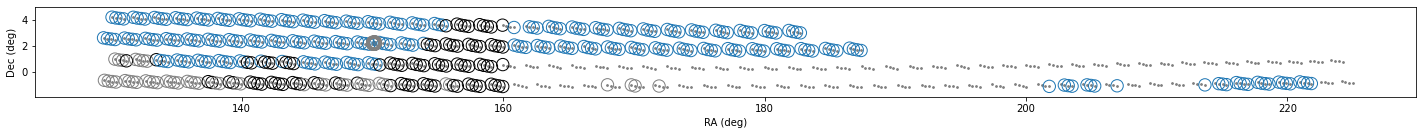

In [120]:
fig, ax = plt.subplots(1,1,figsize=(20,4),)
ax.set_aspect('equal')


plt.scatter ( oiii_s2022a['RA'], oiii_s2022a['dec'], color='grey', s=3 )
for name, qrow in is_queued_oiii.iterrows():
    if not qrow['is_queued']:
        continue
    if isinstance(qrow['qstamp'], str):
        if '202201' in qrow['qstamp']:
            color='k'
        else:
            color = 'tab:blue'
    else:
        color='grey'
    row = oiii_s2022a.loc[name]
    circle = patches.Circle ( (float(row['RA']),float(row['dec'])), 
                             radius=np.sqrt(2.2)/np.pi, facecolor='None', 
                             edgecolor=color)
    ax.add_patch(circle)
    #plt.scatter ( obs['RA'], obs['dec'], color='r')
    
ax.set_xlabel('RA (deg)')
ax.set_ylabel('Dec (deg)')
#ax.set_xlim(125,180)
plt.tight_layout ()
plt.savefig('../../figures/prediction-N540_s2022a.png')

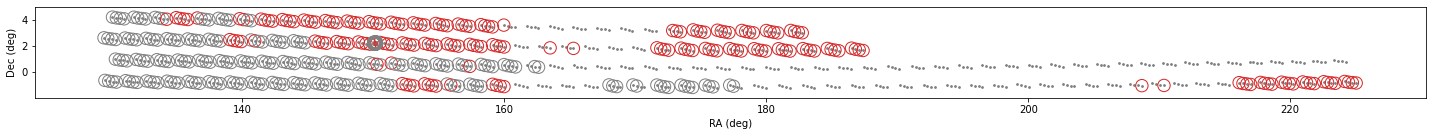

In [122]:
fig, ax = plt.subplots(1,1,figsize=(20,4),)
ax.set_aspect('equal')


plt.scatter ( halpha_s2022a['RA'], halpha_s2022a['dec'], color='grey', s=3 )
for name, qrow in is_queued_halpha.iterrows():
    if not qrow['is_queued']:
        continue
    if isinstance(qrow['qstamp'], str):
        if '202201' in qrow['qstamp']:
            color='grey'
        else:
            color = 'tab:red'
    else:
        color='grey'
    row = halpha_s2022a.loc[name]
    circle = patches.Circle ( (float(row['RA']),float(row['dec'])), 
                             radius=np.sqrt(2.2)/np.pi, facecolor='None', 
                             edgecolor=color)
    ax.add_patch(circle)
    #plt.scatter ( obs['RA'], obs['dec'], color='r')
    
ax.set_xlabel('RA (deg)')
ax.set_ylabel('Dec (deg)')
#ax.set_xlim(125,180)
plt.tight_layout ()
plt.tight_layout ()
plt.savefig('../../figures/prediction-N708_s2022a.png')